# Laboratório 2 - Detecção de Erros com CRC

Repo: https://github.com/helenasatyro/computer_networks_lab02
Maria Helena Sátyro Gomes Alves - 122110164

## Implementação do Gerador de CRC

In [2]:
def xor_bits(a, b):
    """
    Realiza a operação de XOR bit a bit entre duas strings binárias de mesmo comprimento.
    """
    resultado = ""
    for i in range(len(a)):
        if a[i] == b[i]:
            resultado += '0'
        else:
            resultado += '1'
    return resultado


def calcular_crc_manual(dados_bits: str, gerador_bits: str) -> str:
    """
    Calcula o CRC para uma sequência de dados M(x) usando um gerador G(x).
    
    Args:
        dados_bits: A string binária representando o polinômio da mensagem, M(x).
        gerador_bits: A string binária representando o polinômio gerador, G(x).
        
    Returns:
        A string binária de r bits representando o CRC.
    """
    # 1. Obtenha o grau 'r' do gerador.
    #    Lembre-se que um gerador de n bits representa um polinômio de grau n-1.
    r = len(gerador_bits) - 1
    
    # 2. Crie M(x) * 2^r, que é a mensagem com 'r' zeros anexados.
    mensagem_aumentada = list(dados_bits + '0' * r)
    
    # 3. Implemente o loop de divisão.
    #    Percorra a mensagem bit a bit.
    for i in range(len(dados_bits)):
        # Se o bit mais significativo da 'janela' atual for '1', realize o XOR.
        # - a janela 
        if mensagem_aumentada[i] == '1':
            # print("".join(mensagem_aumentada))
            janela_atual = "".join(mensagem_aumentada[i : i + r + 1])
            # print(i*" " + janela_atual)
            # print(i*" " + gerador_bits)
            # print(i*" " + "-----")
            resultado_xor = xor_bits(janela_atual, gerador_bits)
            # print(i*" " + " " + resultado_xor[1:])
            
            # Atualize a mensagem com o resultado do XOR.
            for j in range(1,len(resultado_xor)):
                mensagem_aumentada[i + j] = resultado_xor[j]
    
    # 4. O resto da divisão são os 'r' bits finais da mensagem processada.
    resto = "".join(mensagem_aumentada[-r:])
    return resto



In [3]:
# Exemplo de uso para validação
dados_teste = "1101011111"  # M(x)
gerador_teste = "10011"    # G(x)
crc_calculado = calcular_crc_manual(dados_teste, gerador_teste)
quadro = dados_teste + crc_calculado 

print(f"Dados M(x): {dados_teste}")
print(f"Gerador G(x): {gerador_teste}")
print(f"CRC Calculado: {crc_calculado}")
print(f"Quadro Calculado: {quadro}")

Dados M(x): 1101011111
Gerador G(x): 10011
CRC Calculado: 0010
Quadro Calculado: 11010111110010


## Comparação de Performance

In [4]:
%pip install crc

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [5]:
import time
import tracemalloc
import os
from crc import Calculator, Crc16

# Usando um padrão de 16 bits como referência
calculator_lib = Calculator(Crc16.MODBUS)

# Tamanhos de mensagem para teste (em bytes)
tamanhos_bytes = [1500, 3000 , 6000 , 16000]

resultados = []

for tamanho in tamanhos_bytes:
    print(f"Analisando para mensagem de {tamanho} bytes...")
    # Gere uma mensagem aleatória de bits
    mensagem_bytes = os.urandom(tamanho)
    mensagem_bits = "".join(format(byte, '08b') for byte in mensagem_bytes)
    
    # Medição da nossa Implementação
    tracemalloc.start()
    start_time = time.perf_counter()
    
    crc_manual = calcular_crc_manual(mensagem_bits, "11000000000000101") # G(x) do CRC-16/MODBUS
    
    end_time = time.perf_counter()
    mem_atual_manual, mem_pico_manual = tracemalloc.get_traced_memory()
    tracemalloc.stop()
    
    tempo_manual = end_time - start_time
    
    # Medição da Biblioteca
    tracemalloc.start()
    start_time = time.perf_counter()
    
    crc_lib = calculator_lib.checksum(mensagem_bytes)
    
    end_time = time.perf_counter()
    mem_atual_lib, mem_pico_lib = tracemalloc.get_traced_memory()
    tracemalloc.stop()
    
    tempo_lib = end_time - start_time
    
    # Armazene os resultados
    resultados.append({
        "tamanho": tamanho,
        "tempo_manual": tempo_manual,
        "mem_pico_manual": mem_pico_manual / 1024,
        "tempo_lib": tempo_lib,
        "mem_pico_lib": mem_pico_lib / 1024
    })

print("--- Resultados Finais ---")
print(resultados)

Analisando para mensagem de 1500 bytes...
Analisando para mensagem de 3000 bytes...
Analisando para mensagem de 6000 bytes...
Analisando para mensagem de 16000 bytes...
--- Resultados Finais ---
[{'tamanho': 1500, 'tempo_manual': 0.10343201001523994, 'mem_pico_manual': 105.7587890625, 'tempo_lib': 0.10689118001027964, 'mem_pico_lib': 10.1357421875}, {'tamanho': 3000, 'tempo_manual': 0.2259660699928645, 'mem_pico_manual': 211.2275390625, 'tempo_lib': 0.18422359999385662, 'mem_pico_lib': 0.69140625}, {'tamanho': 6000, 'tempo_manual': 0.4135222299955785, 'mem_pico_manual': 422.1884765625, 'tempo_lib': 0.34683913001208566, 'mem_pico_lib': 0.69140625}, {'tamanho': 16000, 'tempo_manual': 1.0409826899995096, 'mem_pico_manual': 1125.3134765625, 'tempo_lib': 0.9766655800049193, 'mem_pico_lib': 0.69140625}]


/home/helenavm/.local/lib/python3.10/site-packages/matplotlib/projections/__init__.py:63: UserWarning: Unable to import Axes3D. This may be due to multiple versions of Matplotlib being installed (e.g. as a system package and as a pip package). As a result, the 3D projection is not available.
  warnings.warn("Unable to import Axes3D. This may be due to multiple versions of "


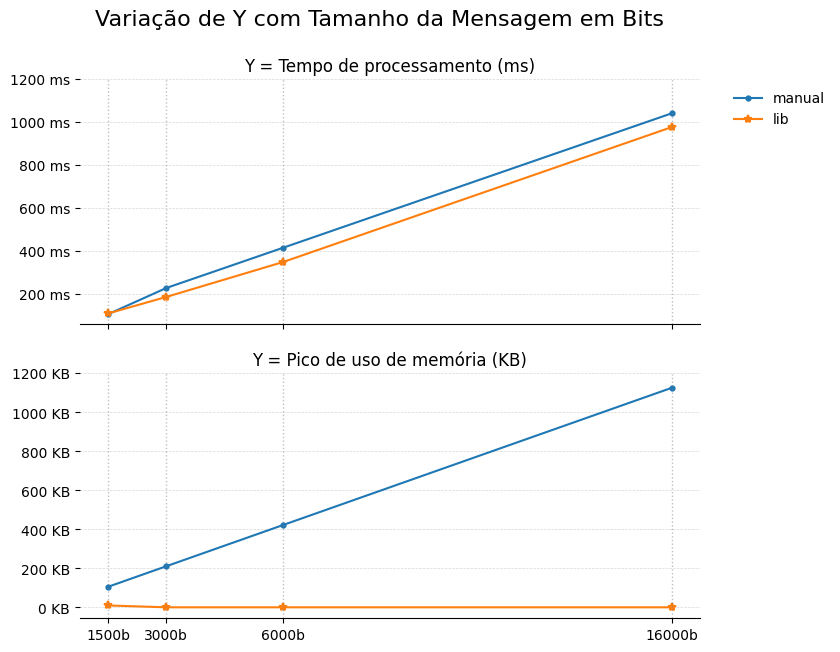

In [6]:
import matplotlib.pyplot as plt

x_values = [x["tamanho"] for x in resultados]

fig, (time, memory) = plt.subplots(nrows=2, ncols=1, figsize=(8, 7), sharex=True)
fig.suptitle("Variação de Y com Tamanho da Mensagem em Bits", fontsize=16)

time.plot(x_values, [y["tempo_manual"]*1000 for y in resultados], ".-", color='tab:blue', linewidth=1.5, markeredgewidth=1.5, label="manual")
time.plot(x_values, [y["tempo_lib"]*1000 for y in resultados], "*-", color='tab:orange', linewidth=1.5, markeredgewidth=1.5, label="lib")

time.set_title("Y = Tempo de processamento (ms)", fontsize=12)
time.set_ylim(top=1200)
time.yaxis.set_major_formatter('{x:1.0f} ms')
time.spines['top'].set_visible(False)
time.spines['right'].set_visible(False)
time.spines['left'].set_visible(False)
time.grid(True, axis='y', linestyle='--', linewidth=0.5, alpha=0.5)

memory.plot(x_values, [y["mem_pico_manual"] for y in resultados], ".-", color='tab:blue', linewidth=1.5, markeredgewidth=1.5)
memory.plot(x_values, [y["mem_pico_lib"] for y in resultados], "*-", color='tab:orange', linewidth=1.5, markeredgewidth=1.5)

memory.set_title("Y = Pico de uso de memória (KB)", fontsize=12)
memory.set_xticks(x_values)
memory.yaxis.set_major_formatter('{x:1.0f} KB')
memory.xaxis.set_major_formatter('{x:1.0f}b')
memory.set_ylim(top=1200)
memory.spines['top'].set_visible(False)
memory.spines['right'].set_visible(False)
memory.spines['left'].set_visible(False)
memory.grid(True, axis='y', linestyle='--', linewidth=0.5, alpha=0.5)



for x in x_values:
    time.axvline(x=x, color='gray', linestyle=':', linewidth=1, alpha=0.5)
    memory.axvline(x=x, color='gray', linestyle=':', linewidth=1, alpha=0.5)

fig.legend(
    loc="upper center",
    bbox_to_anchor=(1, 0.88),  
    ncol=1,
    frameon=False
)

fig.align_ylabels()
plt.show()

Máquina:
* OS: Ubuntu 22.04.5 LTS x86_64
* Host: Windows Subsystem for Linux - Ubuntu (2.2.4)
* Kernel: Linux 5.15.153.1-microsoft-standard-WSL2
* CPU: Intel(R) Core(TM) i5-8265U (8) @ 1.80 GHz
* GPU: Intel(R) UHD Graphics 620 (128.00 MiB) [Integrated]
* Memory: 3.85 GiB / 7.70 GiB (50%)
* Swap: 0 B / 2.00 GiB (0%)

Comentário:

Observando a visualização é possível perceber que o tempo de processamento tende a crescer de forma similar em ambas as implementações, com a biblioteca atingindo melhores constantes com o crescimento da mensagem, compatível com a existência de overheads para proporcionar os ganhos em uso de memória observáveis no gráfico inferior.

O uso de memória, no caso da implementação manual, cresce de forma linear, possivelmente por causa das operações intermediárias em que guardamos toda a mensagem e operamos sobre ela. Especialmente a criação de listas e uso de join sobre elas cria cópias da mensagem que representam consumo adicional de memória de forma diretamente proporcional ao tamanho da mesma.



## Análise Investigativa da Detecção de Erros

### Preparação

In [14]:
meu_nome= "Maria Helena Satyro Gomes Alves"
MENSAGEM_BASE_BYTES = "4d,61,72,69,61,20,48,65,6c,65,6e,61,20,53,61,74,79,72,6f,20,47,6f,6d,65,73,20,41,6c,76,65,73"

MENSAGEM_BASE_BYTES = MENSAGEM_BASE_BYTES.split(',')
MENSAGEM_BASE_BYTES = bytes(int(hex_val, 16) for hex_val in MENSAGEM_BASE_BYTES)

MENSAGEM_BASE_BITS = "".join(format(byte, '08b') for byte in MENSAGEM_BASE_BYTES)

print(MENSAGEM_BASE_BITS)


01001101011000010111001001101001011000010010000001001000011001010110110001100101011011100110000100100000010100110110000101110100011110010111001001101111001000000100011101101111011011010110010101110011001000000100000101101100011101100110010101110011


Ultimo digito da minha matricula = 4

| VARIAVEL              | VALOR |
| :-                    | :-    |
| `MENSAGEM`            |   01001101011000010111001001101001011000010010000001001000011001010110110001100101011011100110000100100000010100110110000101110100011110010111001001101111001000000100011101101111011011010110010101110011001000000100000101101100011101100110010101110011   |
| `MENSAGEM_BASE`       |   Maria Helena Satyro Gomes Alves   |
| `CRC`                 |   CRC-16/ARC -> CRC-16/MODBUS -> 0x8005 |

### Caça aos erros

In [ ]:
import random

random.seed(1995667770)

def experimento(results):
    def generate_error(quadro, n_bits):
        start = random.randint(0, len(quadro) - n_bits)
        error_pattern = ''.join(random.choice('01') for _ in range(n_bits))
        return (start, error_pattern)

    def apply_error(quadro, start, pattern):
        quadro = list(quadro)
        original_slice = quadro[start:start+len(pattern)]  
        
        for i in range(len(pattern)):
            quadro[start+i] = "0" if quadro[start+i] == pattern[i] else "1"
        
        modified_slice = quadro[start:start+len(pattern)]  
        return "".join(quadro), "".join(original_slice), "".join(modified_slice)


    calculator_lib = Calculator(Crc16.MODBUS)
    GERADOR_PESSOAL = "11000000000000101"
    CRC_BASE_MANUAL = calcular_crc_manual(MENSAGEM_BASE_BITS, GERADOR_PESSOAL)
    CRC_BASE_LIB = calculator_lib.checksum(MENSAGEM_BASE_BYTES)

    QUADRO_TRANSMITIDO_MANUAL = MENSAGEM_BASE_BITS + CRC_BASE_MANUAL
    QUADRO_TRANSMITIDO_LIB = MENSAGEM_BASE_BYTES + CRC_BASE_LIB.to_bytes(2, byteorder='little')

    error_sizes = [i for i in range(256)]

    for error_size in error_sizes:
        start, pattern = generate_error(QUADRO_TRANSMITIDO_MANUAL, error_size)
        QUADRO_CORROMPIDO_MANUAL, og_slice_man, mod_slice_man = apply_error(QUADRO_TRANSMITIDO_MANUAL, start, pattern)
        QUADRO_CORROMPIDO_LIB, og_slice_lib, mod_slice_lib  = apply_error(''.join(format(byte, '08b') for byte in QUADRO_TRANSMITIDO_LIB), start, pattern)

        CRC_CHECK_MANUAL = calcular_crc_manual(QUADRO_CORROMPIDO_MANUAL, GERADOR_PESSOAL)
        CRC_CHECK_LIB = calculator_lib.checksum(bytes([int(QUADRO_CORROMPIDO_LIB[i:i+8], 2) for i in range(0, len(QUADRO_CORROMPIDO_LIB), 8)]))

        results.append(
            {
                "start": start,
                "pattern": pattern,
                "pattern_size": len(pattern),
                "corr_manual": QUADRO_CORROMPIDO_MANUAL,
                "corr_lib": QUADRO_CORROMPIDO_LIB,
                "crc_check_man": CRC_CHECK_MANUAL,
                "crc_check_lib": CRC_CHECK_LIB,
                "detected_man": (og_slice_man == mod_slice_man and all( c == "0" for c in CRC_CHECK_MANUAL)) or not all( c == "0" for c in CRC_CHECK_MANUAL),
                "detected_lib": (og_slice_lib == mod_slice_lib and CRC_CHECK_LIB == 0) or CRC_CHECK_LIB != 0,
                "og_slice_man": og_slice_man,
                "mod_slice_man": mod_slice_man,
                "og_slice_lib": og_slice_lib,
                "mod_slice_lib": mod_slice_lib,
            }
        )




In [79]:
undetected_accumulator = []

In [95]:
for i in range(100):    
    results_accumulator = []
    for j in range(10):
        experimento(results_accumulator)
    undetected_accumulator.extend([r for r in results_accumulator if r["detected_man"] == False or r["detected_lib"] == False])


In [98]:
undetected_cases_sorted = sorted(undetected_accumulator, key=lambda x: x["pattern_size"])
for r in undetected_cases_sorted:
    print("Pattern size -> ", r["pattern_size"])
    print("Number of flipped bits -> ",  sum(1 for a, b in zip(r["og_slice_man"], r["mod_slice_man"]) if a != b))
    print("Pattern affected CRC -> ", (r["start"] + r["pattern_size"]) >= len(MENSAGEM_BASE_BITS))
    print("Lib Detected -> ", r["detected_lib"])
    print("Manual Detected -> ", r["detected_man"])
    print("="*50)
    


Pattern size ->  36
Number of flipped bits ->  20
Pattern affected CRC ->  False
Lib Detected ->  True
Manual Detected ->  False
Pattern size ->  37
Number of flipped bits ->  20
Pattern affected CRC ->  False
Lib Detected ->  True
Manual Detected ->  False
Pattern size ->  52
Number of flipped bits ->  24
Pattern affected CRC ->  False
Lib Detected ->  True
Manual Detected ->  False
Pattern size ->  56
Number of flipped bits ->  32
Pattern affected CRC ->  True
Lib Detected ->  True
Manual Detected ->  False
Pattern size ->  73
Number of flipped bits ->  36
Pattern affected CRC ->  True
Lib Detected ->  False
Manual Detected ->  True
Pattern size ->  76
Number of flipped bits ->  32
Pattern affected CRC ->  False
Lib Detected ->  False
Manual Detected ->  True
Pattern size ->  78
Number of flipped bits ->  32
Pattern affected CRC ->  False
Lib Detected ->  True
Manual Detected ->  False
Pattern size ->  88
Number of flipped bits ->  44
Pattern affected CRC ->  False
Lib Detected ->  F

In [ ]:
def count_flipped_bits(original, modified):
    """Count differing bits between two bit strings"""
    return sum(1 for a, b in zip(original, modified) if a != b)


def analyze_undetected_errors(undetected_cases):
    if not undetected_cases:
        print("No undetected errors to analyze")
        return None
    
    for r in undetected_cases:
        r["flipped_bits_man"] = count_flipped_bits(r["og_slice_man"], r["mod_slice_man"])
        r["flipped_bits_lib"] = count_flipped_bits(r["og_slice_lib"], r["mod_slice_lib"])
    
    undetected_both = [r for r in undetected_cases if not r["detected_man"] and not r["detected_lib"]]
    
    # Cases where only one failed
    undetected_man_only = [r for r in undetected_cases if not r["detected_man"] and r["detected_lib"]]
    undetected_lib_only = [r for r in undetected_cases if r["detected_man"] and not r["detected_lib"]]
    
    crc_affected = [
        r for r in undetected_cases
        if (r["start"] + r["pattern_size"]) >= len(MENSAGEM_BASE_BITS)
    ]
    
    total_undetected = len(undetected_cases)
    
    stats = {
        "min_pattern_all": min(r["pattern_size"] for r in undetected_cases),
        "min_pattern_both": min(r["pattern_size"] for r in undetected_both) if undetected_both else None,
        "min_pattern_man": min(r["pattern_size"] for r in undetected_man_only) if undetected_man_only else None,
        "min_pattern_lib": min(r["pattern_size"] for r in undetected_lib_only) if undetected_lib_only else None,
        
        "min_flips_all": min(min(r["flipped_bits_man"], r["flipped_bits_lib"]) for r in undetected_cases),
        "min_flips_both": min(min(r["flipped_bits_man"], r["flipped_bits_lib"]) for r in undetected_both) if undetected_both else None,
        "min_flips_undetected_man": min(r["flipped_bits_man"] for r in undetected_cases if not r["detected_man"]),
        "min_flips_undetected_lib": min(r["flipped_bits_lib"] for r in undetected_cases if not r["detected_lib"]),
        
        "pct_both": len(undetected_both)/total_undetected * 100,
        "pct_man_only": len(undetected_man_only)/total_undetected * 100,
        "pct_lib_only": len(undetected_lib_only)/total_undetected * 100,
        "pct_crc_affected": len(crc_affected)/total_undetected * 100,
    }
    
    print("\nUndetected Error Analysis:")
    print(f"Total undetected cases: {total_undetected}")
    
    print("\nMinimum pattern sizes:")
    print(f"- All undetected: {stats['min_pattern_all']}")
    print(f"- Both failed: {stats['min_pattern_both']}")
    print(f"- Manual only failed: {stats['min_pattern_man']}")
    print(f"- Library only failed: {stats['min_pattern_lib']}")
    
    print("\nMinimum flipped bits:")
    print(f"- All undetected: {stats['min_flips_all']}")
    print(f"- Both failed: {stats['min_flips_both']}")
    print(f"- Manual failed:{stats['min_flips_undetected_man']}")
    print(f"- Library only failed: {stats['min_flips_undetected_lib']}")
        
    print("\nDetection failure distribution:")
    print(f"- Both implementations failed: {stats['pct_both']:.1f}%")
    print(f"- Only manual failed: {stats['pct_man_only']:.1f}%")
    print(f"- Only library failed: {stats['pct_lib_only']:.1f}%")
    
    print(f"\nCRC affected in undetected cases: {stats['pct_crc_affected']:.1f}%")
    
    return stats

analysis = analyze_undetected_errors(undetected_cases_sorted)


Undetected Error Analysis:
Total undetected cases: 18

Minimum pattern sizes:
- All undetected: 36
- Both failed: None
- Manual only failed: 36
- Library only failed: 73

Minimum flipped bits:
- All undetected: 20
- Both failed: None
- Manual failed:20
- Library only failed: 32

Detection failure distribution:
- Both implementations failed: 0.0%
- Only manual failed: 55.6%
- Only library failed: 44.4%

CRC affected in undetected cases: 22.2%


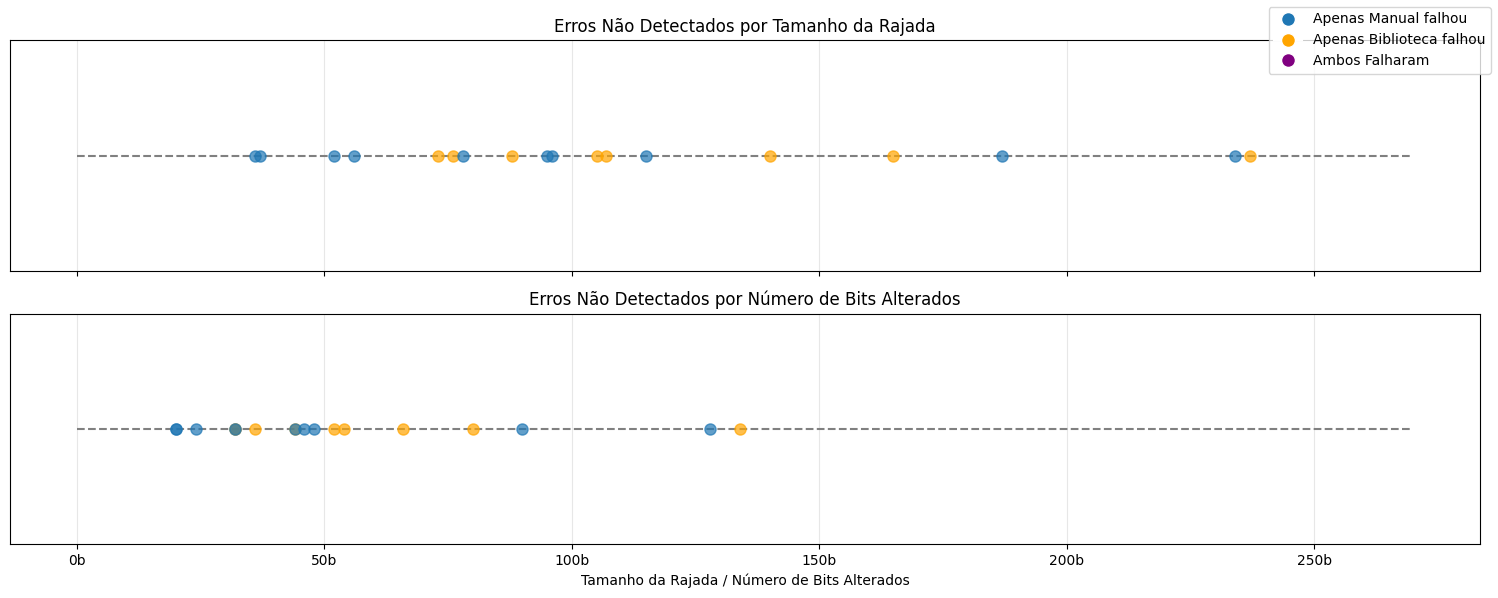

In [122]:
import matplotlib.pyplot as plt
import numpy as np

def plotar_erros_nao_detectados(casos_nao_detectados):
    # Preparar dados
    tamanhos_padrao = []
    bits_alterados = []
    cores = []
    
    for caso in casos_nao_detectados:
        tamanhos_padrao.append(caso["pattern_size"])
        bits_alterados.append(min(caso["flipped_bits_man"], caso["flipped_bits_lib"]))
        if not caso["detected_man"] and not caso["detected_lib"]:
            cores.append('purple')  # Ambos falharam
        elif not caso["detected_man"]:
            cores.append('tab:blue')  # Apenas manual
        else:
            cores.append('orange')  # Apenas biblioteca
    
    # Criar figura com dois gráficos
    fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(15, 6), sharex=True)
    
    # Gráfico superior - Tamanho da Rajada
    ax1.hlines(1, 0, 270, colors='gray', linestyles='dashed')
    for tamanho, cor in zip(tamanhos_padrao, cores):
        ax1.plot(tamanho, 1, 'o', markersize=8, color=cor, alpha=0.7)
    ax1.set_title('Erros Não Detectados por Tamanho da Rajada')
    ax1.set_yticks([])
    ax1.grid(axis='x', alpha=0.3)
    
    # Gráfico inferior - Bits Alterados
    ax2.hlines(1, 0, 270, colors='gray', linestyles='dashed')
    for bits, cor in zip(bits_alterados, cores):
        ax2.plot(bits, 1, 'o', markersize=8, color=cor, alpha=0.7)
    ax2.set_title('Erros Não Detectados por Número de Bits Alterados')
    ax2.set_xlabel('Tamanho da Rajada / Número de Bits Alterados')
    ax2.set_yticks([])
    ax2.grid(axis='x', alpha=0.3)
    
    # Criar legenda unificada
    elementos_legenda = [
        plt.Line2D([0], [0], marker='o', color='w', label='Apenas Manual falhou',
                  markerfacecolor='tab:blue', markersize=10),
        plt.Line2D([0], [0], marker='o', color='w', label='Apenas Biblioteca falhou',
                  markerfacecolor='orange', markersize=10),
        plt.Line2D([0], [0], marker='o', color='w', label='Ambos Falharam',
                  markerfacecolor='purple', markersize=10)
    ]
    fig.legend(handles=elementos_legenda, loc='upper right')
    ax2.xaxis.set_major_formatter(lambda x, pos: f"{int(x)}b")

    
    plt.tight_layout()
    plt.show()

# Uso
plotar_erros_nao_detectados(undetected_cases_sorted)

Para poder observar melhor os padrões de erros não detectados, realizei um experimento maior com 100 testes e tamanhos indo de 0 a 256 bits para o padrão de erros, e os casos de erro estão registrados acima. IA generativa foi usada para gerar o código que computa os valores e printá-los, a análise não veio da IA.

#### Observações dos Casos de Erro

- Todos os casos acontecem com tamanhos de padrão de erro maiores que 36 e números de bits trocados maiores que 20, porém esses valores são os mínimos do manual. A biblioteca só falhou com padrões maiores que 73 e ao menos 32 flips. Isso condiz com o fato que a capacidade máxima de garantia de detecção para um CRC de tamanho N seja de uma rajada de N bits. Apesar de não obtermos o valor mínimo, não ocorreramfalhas com rajadas menores.
- Todos os casos acontecem com números *pares* de bits trocados. Isso é condizente com as definições teóricas do MODBUS.
- Nenhum caso teve erro de ambas as implementações, e a biblioteca teve cerca de 11 pontos percentuais a menos de falhas de detecção, sendo mais robusta.
- 22.2% dos casos não detectados de erro tiveram o CRC original afetado pelo padrão de erros, o que sugere que afetar o CRC não leva a mais erros.
- Observando os plots acima, não foi possível identificar uma relação entre tamanho de rajada e quantidade de bits alterados que explique o motivo da separação dos casos de falha, não consegui identificar qual seria o motivo.
- Ao todo foram executados, para cada tamanho de padrão de erro, 2000 iterações (a acumulação foi rodada duas vezes), e foram testados erros de 1 a 255 bits, ou seja: 1.02 milhões de testes. Que resultaram em apenas 18 casos não detectados (usando duas implementações complementares). Assim, temos uma taxa de falhas de aproximadamente 1.8 * 10^-5. Podemos concluir que esse método de detecção é consideravelmente eficiente para nosso tamanho de mensagem. Essa eficiência, claro, depende do tamanho típico da rajada de erro do meio real: se for consistentemente maior que 16, a eficiência vai depender da quantidade de flips pares que ocorrem. 

Abaixo, realizo um último experimento com apenas 10 tentativas (ainda para os 256 tamanhos). Como falhas de detecção são raras, foi necessário rodar várias vezes até obter um caso de não detecção.

#### Análise final 

In [106]:
i = 0
while True:
    i+=1
    res_experimento_final = []
    experimento(res_experimento_final)
    if len([r for r in res_experimento_final if r["detected_man"] == False or r["detected_lib"] == False]) > 0:
        break

print(i, "execuções dos 256 tamanhos para obter o primeiro erro")

70 execuções dos 256 tamanhos para obter o primeiro erro


In [110]:
res_experimento_final
def add_flipped_bits_to_results(results):
    for result in results:
        # Compute flipped bits for manual implementation
        result["flipped_bits_man"] = sum(
            1 for orig, mod in zip(result["og_slice_man"], result["mod_slice_man"])
            if orig != mod
        )
        
        # Compute flipped bits for library implementation
        result["flipped_bits_lib"] = sum(
            1 for orig, mod in zip(result["og_slice_lib"], result["mod_slice_lib"])
            if orig != mod
        )
    
    return results

# Usage:
results_with_flips = add_flipped_bits_to_results(res_experimento_final)
failed_detections = [r for r in results_with_flips if r["detected_man"] == False or r["detected_lib"] == False]

In [123]:
first_fail = failed_detections[0] # nesse caso também o único
print("Tamanho da rajada: ", first_fail["pattern_size"])
print("Quantidade de flips: ", first_fail["flipped_bits_man"])
print("Manual detectou: ", first_fail["detected_man"])
print("Biblioteca detectou: ", first_fail["detected_lib"])
print("CRC man x CRC lib: ", first_fail["crc_check_man"], first_fail["crc_check_lib"])

Tamanho da rajada:  26
Quantidade de flips:  14
Manual detectou:  True
Biblioteca detectou:  False
CRC man x CRC lib:  0110000010010000 0


Novamente, observamos que o tamanho da rajada foi superior a 16 e que a quantidade de flips foi par. O que está de acordo com as observações feitas anteriormente sobre as limitações do MODBUS 16b.